Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# load and confirm the shape
from numpy import load
input_train = load('dogs_vs_cats_photos.npy')
label_train = load('dogs_vs_cats_labels.npy')

input_test = load('test_photos.npy')
label_test = load('test_labels.npy')

Shaping Data

In [3]:
#reshape your input to (amount of data, px width, px height, color wave (RGB))
#reshape your labels to(amount of data)

input_train = input_train.reshape(len(input_train), 200, 200, 3) 
label_train = label_train.reshape(len(label_train), 1) 

input_test = input_test.reshape(len(input_test), 200, 200, 3) 
label_test = label_test.reshape(len(label_test), 1) 

input_train /= 255
input_test /= 255

In [4]:
print("shape of input_train", input_train.shape)
print("shape of label_train", label_train.shape)
print("shape of input_test", input_test.shape)
print("shape of label_test", label_test.shape)


shape of input_train (12002, 200, 200, 3)
shape of label_train (12002, 1)
shape of input_test (998, 200, 200, 3)
shape of label_test (998, 1)


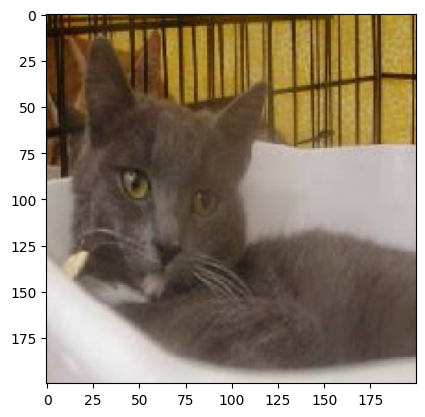

In [5]:
i = random.randint(0, len(input_train))

plt.imshow(input_train[i])

Model

In [6]:
model = Sequential([
    #if taking too long use (5,5) not (7,7) for max pooling (size mismatch)
    Conv2D(32, (3,3), activation='relu', input_shape = (200,200,3)), #applying filter to see depth
    MaxPooling2D(pool_size=(2,2)), #pooling depth

    #stick to (5,5)pooling size if you used it on the last one
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(), #flattening filters to image

    Dense(64, activation='relu'), #classifying image
    Dense(1, activation='sigmoid') #outputting classification
])

c:\Users\Stemdev6\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compile settings for training

#standard parameters- also works really well with image identification (no need to change)
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#think of epoch as number of work-outs and batch size as sets per training
model.fit(input_train, label_train, epochs=5, batch_size=100)

Epoch 1/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 118s 827ms/step - accuracy: 0.9614 - loss: 0.1191
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 75s 618ms/step - accuracy: 0.9839 - loss: 0.0656
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 74s 604ms/step - accuracy: 0.9930 - loss: 0.0353
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 76s 625ms/step - accuracy: 0.9969 - loss: 0.0217
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 73s 592ms/step - accuracy: 0.9991 - loss: 0.0125


In [12]:
model.evaluate(input_test, label_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7927 - loss: 1.1567


[1.7963252067565918, 0.702404797077179]

Showcase

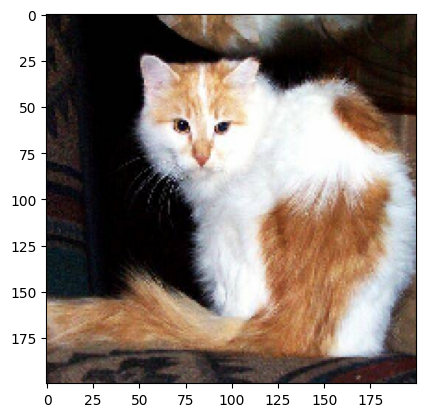

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[0.06710558]] probability of dog
therefourth it's a cat


In [44]:
index = random.randint(0, len(label_test))

plt.imshow(input_test[index])
plt.show()

label_predict = model.predict(input_test[index].reshape(1, 200, 200, 3))
print(label_predict, "probability of dog")

if(label_predict > 0.5):
    print("therefourth it's a dog" )
else:
    print("therefourth it's a cat")

In [ ]:
print(len(input_train))
print(len(input_test))